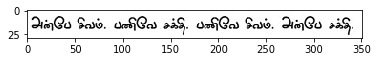

In [57]:
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

img = rgb2gray(imread('resources/tamil.jpg'))
plt.imshow(img, cmap="gray")
plt.show()

#### The idea behind word segmentation is to first binarize the image and then find the vertical projection of the image to find long white blocks because thats what represents spaces.

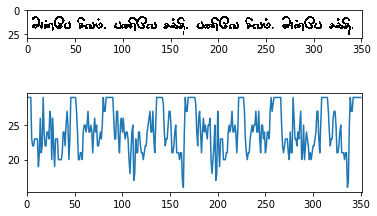

In [58]:
import numpy as np
from skimage.filters import threshold_otsu
from skimage.filters import gaussian

#binarize the image, guassian blur will remove any noise in the image
thresh = threshold_otsu(gaussian(img))
binary = img > thresh

# find the vertical projection by adding up the values of all pixels along rows
vertical_projection = np.sum(binary, axis=0)

# plot the vertical projects
fig, ax = plt.subplots(nrows=2)
plt.xlim(0, img.shape[1])
ax[0].imshow(binary, cmap="gray")
ax[1].plot(vertical_projection)

#### if you look at the plot above and compare it with the spaces in the actual image you can see that each block on tet will be separated by a sequence of spaces whose vertical projection value will be equal to the height on the image sample. 

#### We will use this information to seperate the words in the image.

In [59]:
height = img.shape[0]

## we will go through the vertical projections and 
## find the sequence of consecutive white spaces in the image
whitespace_lengths = []
whitespace = 0
for vp in vertical_projection:
    if vp == height:
        whitespace = whitespace + 1
    elif vp != height:
        if whitespace != 0:
            whitespace_lengths.append(whitespace)
        whitespace = 0 # reset whitepsace counter. 

print("whitespaces:", whitespace_lengths)
avg_white_space_length = np.mean(whitespace_lengths)
print("average whitespace lenght:", avg_white_space_length)

whitespaces: [5, 1, 6, 1, 8, 7, 1, 8, 6, 1, 8, 1, 7, 1]
average whitespace lenght: 4.357142857142857


In [60]:
## find index of whitespaces which are actually long spaces using the avg_white_space_length
whitespace_length = 0
divider_indexes = []
for index, vp in enumerate(vertical_projection):
    if vp == height:
        whitespace_length = whitespace_length + 1
    elif vp != height:
        if whitespace_length != 0 and whitespace_length > avg_white_space_length:
            divider_indexes.append(index-int(whitespace_length/2))
            whitespace_length = 0 # reset it
            
print(divider_indexes)

[3, 49, 87, 140, 173, 225, 263, 312]


In [61]:
# lets create the block of words from divider_indexes
divider_indexes = np.array(divider_indexes)
dividers = np.column_stack((divider_indexes[:-1],divider_indexes[1:]))

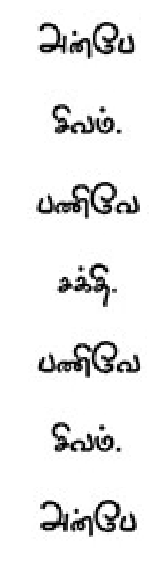

In [66]:
# now plot the findings
fig, ax = plt.subplots(nrows=len(dividers), figsize=(5,10))
for index, window in enumerate(dividers):
    ax[index].axis("off")
    ax[index].imshow(img[:,window[0]:window[1]], cmap="gray")